In [1]:
###Bandpass filter characterization graphs
import numpy as np
from math import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [105]:
###DEFINE TABLES

#frequencies measured in MHz
freqs=range(100,161)
#The path from siggen to scope is characterized.
#Siggen outputs 1V (?RMS?)
#Scope measures Vpp (peak-to-peak) in volts for the cable characterization
#Siggen+ tripple SMA T + scope cable measured in Volts
cable_raw=np.array([2.08, 2.07, 2.065, 2.06, 2.04, 2.035, 2.015, 2.01, 2.01, 1.975, 1.965, 1.96, 1.945, 1.915, 1.905, 1.88, 1.89, 1.86, 1.85, 1.82,
       1.80, 1.77, 1.76, 1.73, 1.77, 1.76, 1.73, 1.725, 1.71, 1.70, 1.71, 1.705, 1.705, 1.69, 1.68, 1.67, 1.655, 1.655, 1.645, 1.655, 
       1.65, 1.645, 1.635, 1.635, 1.62, 1.615, 1.60, 1.60, 1.60, 1.59, 1.59, 1.58, 1.57, 1.565, 1.54, 1.535, 1.515, 1.495, 1.48, 1.465, 1.45], dtype=float) 
###BPF was measured in mV (millivolts)
bpf_raw = np.array([22, 24.5, 26.5, 29.7, 33, 36.3, 40.5, 46.5, 52.5, 60, 69.3, 81.5, 96, 108, 131.5, 158, 195, 240, 294, 360, 429,
       501, 569, 627, 669, 700, 722, 730, 730, 721, 715, 693, 671, 649, 625, 570, 537.5, 497, 455.5, 413, 
       333, 297, 264, 236, 212, 191, 173, 158, 145, 134, 124, 116, 108, 101.5, 95.7, 90.1, 85.9, 82.3, 79.1, 76.5, 74.2], dtype=float)

#compute values in dB.
cable_db= 20*log(cable_raw/cable_raw[0])
bpf_db_relative_to_self = 20*log(bpf_raw/bpf_raw[0])
bpf_db = 20*log(bpf_raw/cable_raw[0]/1000) 
# NOTE1:should use starting position of 100MHZ
#NOTE2: bpf is measured in mv, divide by 1000
#which should be standard....
#COMPENSATE BPF FOR THE CABLE LOSS to get just BPF performance
bpf_compensated = bpf_db - cable_db

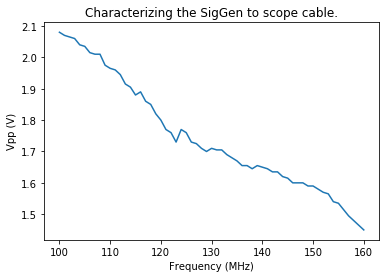

In [64]:
plt.plot(freqs,cable_raw)
plt.title("Characterizing the SigGen to scope cable.")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Vpp (V)")
plt.show()

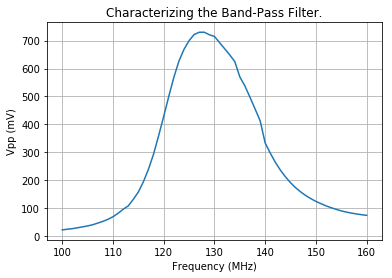

In [65]:
plt.plot(freqs,bpf_raw)
plt.title("Characterizing the Band-Pass Filter.")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Vpp (mV)")
plt.grid(True)
plt.show()

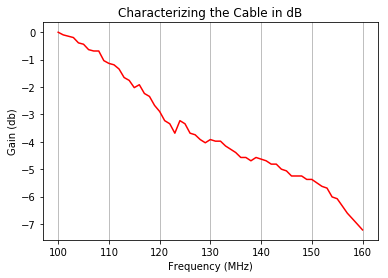

In [103]:
plt.plot(freqs, cable_db, 'r')
plt.grid(True,axis='x')
plt.title("Characterizing the Cable in dB")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain (db)")
plt.show()

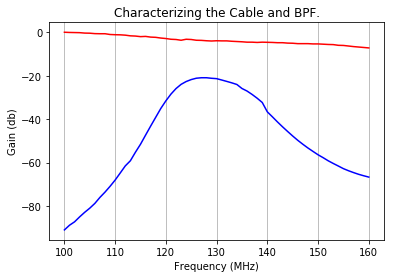

In [106]:
plt.plot(freqs, cable_db, 'r')
plt.plot(freqs, bpf_db, 'b')
plt.grid(True,axis='x')
plt.title("Characterizing the Cable and BPF.")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain (db)")
plt.show()

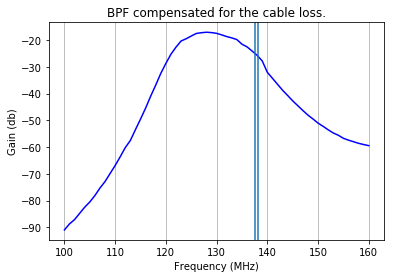

In [111]:
plt.plot(freqs, bpf_compensated, 'b')
plt.grid(True,axis='x')
#plot desired band
plt.axvline(x=137.5)
plt.axvline(x=138.2)
plt.title("BPF compensated for the cable loss.")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain (db)")
plt.show()